# 1. 2D
## 1.1. Dispersion relation of bulk
### 1.1.1. inertial frame of reference

(84, 73, 4) (84, 73, 4, 4)


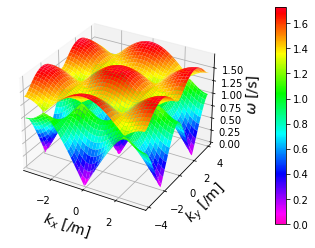

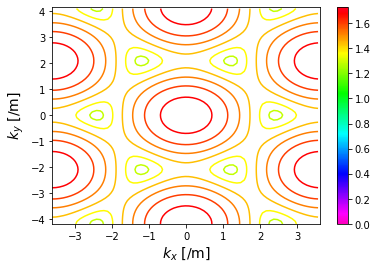

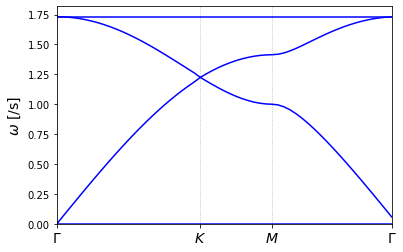

In [1]:
import numpy as np
import numpy.linalg as la



C = 1.
M = 1.
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
precision = 1e-1
xw = np.pi / np.sqrt(3) * 2 # width of x
yw = np.pi / 3 * 4 # width of y
kxs = np.arange(-xw, xw, precision)
kys = np.arange(-yw, yw, precision)


evals_all = np.zeros((len(kys), len(kxs), 4), dtype=np.complex128)
evecs_all = np.zeros((len(kys), len(kxs), 4, 4), dtype=np.complex128)
for y, ky in enumerate(kys):
    for x, kx in enumerate(kxs):
        k = np.array([kx, ky])
        p = np.exp(1.j * k.dot(a1))
        s = np.exp(1.j * k.dot(a2))
        H = w0**2 * np.vstack([
            np.hstack([R11 + R22 + R33, -(R11 + R22 * p.conj() + R33 * s.conj())]),
            np.hstack([-(R11 + R22 * p + R33 * s) ,R11 + R22 + R33]),
        ])
        evals, evecs = la.eigh(H)
        idcs = np.argsort(evals)
        evals, evecs = evals[idcs], evecs[idcs]
        evals_all[y, x] = evals
        evecs_all[y, x] = evecs
evals_all = np.array(evals_all)
evecs_all = np.array(evecs_all)
print(evals_all.shape, evecs_all.shape)


# 3D dispersion
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(kxs, kys)

vmax = np.amax(np.sqrt(evals_all[:, :, 2]).real)
ax.plot_surface(X, Y, np.sqrt(evals_all[:, :, 1]).real, vmin=0., vmax=vmax, cmap='gist_rainbow_r') 
p = ax.plot_surface(X, Y, np.sqrt(evals_all[:, :, 2]).real, vmin=0., vmax=vmax, cmap='gist_rainbow_r') 

ax.set_xlabel(r"$k_x$ [/m]", fontsize=14)
ax.set_xlim(-xw, xw)
ax.set_ylabel(r"$k_y$ [/m]", fontsize=14)
ax.set_ylim(-yw, yw)
ax.set_zlabel(r"$\omega$ [/s]", fontsize=14)
ax.set_zlim(0)

fig.colorbar(p, pad=0.15)
# fig.savefig("2d-graphene-dispersion-3d.png")
plt.show()


# Contour plot
import matplotlib.pyplot as plt
import matplotlib.colors as colors
fig, ax = plt.subplots()
X, Y = np.meshgrid(kxs, kys)

vmax = np.amax(np.sqrt(evals_all[:, :, 2]).real)
cs = plt.contour(X, Y, np.sqrt(evals_all[:, :, 2]).real, vmin=0., vmax=vmax, cmap='gist_rainbow_r') 

plt.xlabel(r"$k_x$ [/m]",  fontsize=14)
plt.xlim(-xw, xw)
plt.ylabel(r"$k_y$ [/m]", fontsize=14)
plt.ylim(-yw, yw)


norm= colors.Normalize(vmin=0., vmax=vmax)
sm = plt.cm.ScalarMappable(norm=norm, cmap=cs.cmap)
sm.set_array([])
fig.colorbar(sm)
# fig.savefig("2d-graphene-dispersion-contour.png")
plt.show()


# Dispersion relation G1 -> K -> M -> G2
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1_ = 2 * np.pi / np.sqrt(3) / a * (x - y / np.sqrt(3)) 
a2_ = 4 * np.pi / 3 / a * y
G = np.array([[0.], [0.]])
K = (a1_ / 2 + a2_ / 4) / np.cos(np.pi / 6)**2
M = a1_ / 2

GK = (K - G)
KM = (M - K)
MG = (G - M)
gk = GK / la.norm(GK)
km = KM / la.norm(KM)
mg = MG / la.norm(MG)
num_gk = int(la.norm(GK) / precision)
num_km = int(la.norm(KM) / precision)
num_mg = int(la.norm(MG) / precision) + 1
kxs = np.hstack([
    [gk[0,0] * precision * i for i in range(num_gk)],
    [km[0,0] * precision * i + GK[0,0] for i in range(num_km)],
    [mg[0,0] * precision * i + GK[0,0] + KM[0,0] for i in range(num_mg)]
])
kys = np.hstack([
    [gk[1,0] * precision * i for i in range(num_gk)],
    [km[1,0] * precision * i + GK[1,0] for i in range(num_km)],
    [mg[1,0] * precision * i + GK[1,0] + KM[1,0] for i in range(num_mg)]
])


evals_all = []
for ky, kx in zip(kys, kxs):
    k = np.array([kx, ky])
    p = np.exp(1.j * k.dot(a1))
    s = np.exp(1.j * k.dot(a2))
    H = w0**2 * np.vstack([
        np.hstack([R11 + R22 + R33, -(R11 + R22 * p.conj() + R33 * s.conj())]),
        np.hstack([-(R11 + R22 * p + R33 * s), R11 + R22 + R33]),
    ])
    evals, evecs = la.eig(H)
    idcs = np.argsort(evals)
    evals, evecs = evals[idcs], evecs[idcs]
    evals_all.append(evals)
evals_all = np.array(evals_all, dtype=np.complex128)


import matplotlib.pyplot as plt
fig = plt.figure()
dr = np.arange(0, precision * len(kxs), precision)
for i in range(4):
    plt.plot(dr, np.sqrt(evals_all[:, i]).real, color='blue')

xticks = [
    0, 
    num_gk * precision, 
    num_gk * precision + num_km * precision, 
    num_gk * precision + num_km * precision + (num_mg - 1) * precision
]
xlabels = [r"$\Gamma$", r"$K$", r"$M$", r"$\Gamma$"]
plt.xticks(xticks, xlabels, fontsize=14)
plt.grid(axis='x', linestyle='dotted')
plt.xlim(0, max(dr))
plt.ylabel(r"$\omega$ [/s]", fontsize=14)
plt.ylim(0)
plt.show()
# fig.savefig("2d-graphene-dispersion.png")

#### 1.1.1.1. Visualize eigenvectors

(84, 73, 4) (84, 73, 4, 4)


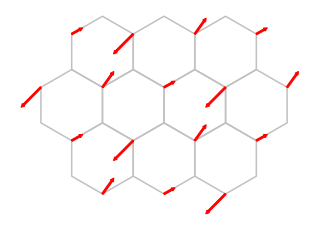

In [2]:
import numpy as np
import numpy.linalg as la



C = 1.
M = 1.
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
precision = 1e-1
xw = np.pi / np.sqrt(3) * 2 # width of x
yw = np.pi / 3 * 4 # width of y
kxs = np.arange(-xw, xw, precision)
kys = np.arange(-yw, yw, precision)


evals_all = np.zeros((len(kys), len(kxs), 4), dtype=np.complex128)
evecs_all = np.zeros((len(kys), len(kxs), 4, 4), dtype=np.complex128)
for y, ky in enumerate(kys):
    for x, kx in enumerate(kxs):
        k = np.array([kx, ky])
        p = np.exp(1.j * k.dot(a1))
        s = np.exp(1.j * k.dot(a2))
        H = w0**2 * np.vstack([
            np.hstack([R11 + R22 + R33, -(R11 + R22 * p.conj() + R33 * s.conj())]),
            np.hstack([-(R11 + R22 * p + R33 * s) ,R11 + R22 + R33]),
        ])
        evals, evecs = la.eigh(H)
        idcs = np.argsort(evals)
        evals, evecs = evals[idcs], evecs[idcs]
        evals_all[y, x] = evals
        evecs_all[y, x] = evecs
evals_all = np.array(evals_all)
evecs_all = np.array(evecs_all)
print(evals_all.shape, evecs_all.shape)




x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1_ = 2 * np.pi / np.sqrt(3) / a * (x - y / np.sqrt(3)) 
a2_ = 4 * np.pi / 3 / a * y
G = np.array([[0.], [0.]])
K = (a1_ / 2 + a2_ / 4) / np.cos(np.pi / 6)**2
M = a1_ / 2

# Parameters #
kx = K[0] 
ky = K[1] 
mode = 2 # 1 or 2
###############

a1 = np.sqrt(3) * a * np.array([1, 0])
a2 = (np.sqrt(3) * np.array([1, 0]) + 3 * np.array([0, 1])) * a / 2.

k = np.array([kx[0], ky[0]])
p = np.exp(1.j * k.dot(a1))
s = np.exp(1.j * k.dot(a2))
idx = min(range(len(kxs)), key=lambda i: abs(kxs[i]-kx[0]))
idy = min(range(len(kys)), key=lambda i: abs(kys[i]-ky[0]))
vec = evecs_all[idy, idx, mode]
xi = vec[:2]
eta = vec[2:4]


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

dx = np.sqrt(3)
offCoord = [
    [0,-.5], [dx,-.5], [2*dx,-.5],
    [0,-.5] - a2, [dx,-.5] - a2, [2*dx,-.5] - a2, [3*dx,-.5] - a2,
    [0,-.5] - 2*a2 + a1, [dx,-.5] - 2*a2 + a1, [2*dx,-.5] - 2*a2 + a1
]

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

for c in offCoord:
    hexagon = RegularPolygon((c[0] + np.sqrt(3) / 2, c[1]), numVertices=6, radius=a, ec='silver', fill=False, lw=1.5)
    ax.add_patch(hexagon)
plt.autoscale(enable = True)
# Xi
for i in range(4):
    xi_ = (xi * p**i).real
    pos = i * a1
    ax.arrow(pos[0], pos[1], xi_[0], xi_[1], width=0.05, head_width=0.1, head_length=0.1, fc='r', ec='r')
for i in range(5):
    xi_ = (xi * s.conj() * p**i).real
    pos = i * a1 - a2
    ax.arrow(pos[0], pos[1], xi_[0], xi_[1], width=0.05, head_width=0.1, head_length=0.1, fc='r', ec='r')
for i in range(4):
    xi_ = (xi * s.conj()**2 * p**(i + 1)).real
    pos = (i + 1) * a1 - 2 * a2
    ax.arrow(pos[0], pos[1], xi_[0], xi_[1], width=0.05, head_width=0.1, head_length=0.1, fc='r', ec='r')
for i in range(3):
    xi_ = (xi * s.conj()**3 * p**(i + 2)).real
    pos = (i + 2) * a1 - 3 * a2
    ax.arrow(pos[0], pos[1], xi_[0], xi_[1], width=0.05, head_width=0.1, head_length=0.1, fc='r', ec='r')
plt.axis('off')
plt.show()


### 1.1.2. Coriolis

(84, 73, 8) (84, 73, 8, 8)


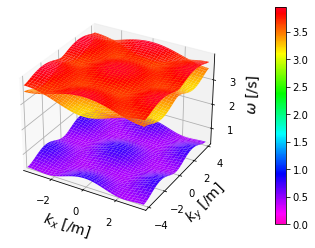

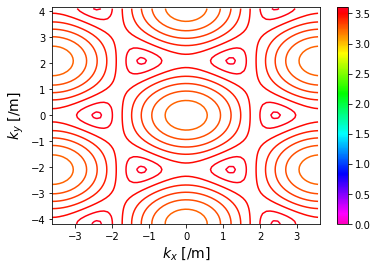

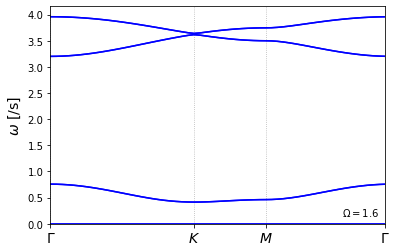

In [98]:
import numpy as np
import numpy.linalg as la


O = 1.6
C = 1.
M = 1.
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
Rw = np.array([[0., -1.], [1., 0.]])
precision = 1e-1
xw = np.pi / np.sqrt(3) * 2 # width of x
yw = np.pi / 3 * 4 # width of y
kxs = np.arange(-xw, xw, precision)
kys = np.arange(-yw, yw, precision)


evals_all = np.zeros((len(kys), len(kxs), 8), dtype=np.complex128)
evecs_all = np.zeros((len(kys), len(kxs), 8, 8), dtype=np.complex128)
for y, ky in enumerate(kys):
    for x, kx in enumerate(kxs):
        k = np.array([kx, ky])
        p = np.exp(1.j * k.dot(a1))
        s = np.exp(1.j * k.dot(a2))
        L11 = np.vstack([
            np.hstack([R11 + R22 + R33, -(R11 + p.conj() * R22 + s.conj() * R33)]),
            np.hstack([-(R11 + p * R22 + s * R33), R11 + R22 + R33])
        ])
        L12 = np.vstack([
            np.hstack([-Rw * 2.j * O, np.zeros((2, 2))]),
            np.hstack([np.zeros((2, 2)), -Rw * 2.j * O])
        ])
        L = w0 ** 2 * np.vstack([
            np.hstack([L11, L12]),
            np.hstack([np.zeros((4, 4)), np.eye(4)])
        ])
        M = np.vstack([
            np.hstack([np.zeros((4, 4)), np.eye(4)]),
            np.hstack([np.eye(4), np.zeros((4, 4))])
        ])

        H = np.linalg.inv(M).dot(L)
        evals, evecs = la.eig(H)
        idcs = np.argsort(evals)
        evals, evecs = evals[idcs], evecs[idcs]
        evals_all[y, x] = evals
        evecs_all[y, x] = evecs
evals_all = np.array(evals_all)
evecs_all = np.array(evecs_all)
print(evals_all.shape, evecs_all.shape)


# 3D dispersion
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(kxs, kys)

vmax = np.amax(evals_all[:, :, 7].real)
ax.plot_surface(X, Y, evals_all[:, :, 5].real, vmin=0., vmax=vmax, cmap='gist_rainbow_r') 
ax.plot_surface(X, Y, evals_all[:, :, 6].real, vmin=0., vmax=vmax, cmap='gist_rainbow_r') 
p = ax.plot_surface(X, Y, evals_all[:, :, 7].real, vmin=0., vmax=vmax, cmap='gist_rainbow_r') 
ax.set_xlabel(r"$k_x$ [/m]", fontsize=14)
ax.set_xlim(-xw, xw)
ax.set_ylabel(r"$k_y$ [/m]", fontsize=14)
ax.set_ylim(-yw, yw)
ax.set_zlabel(r"$\omega$ [/s]", fontsize=14)
# ax.set_zlim(0)

fig.colorbar(p, pad=0.15)
fig.savefig("2dc-graphene-dispersion-3d-" + f'{O:.1f}' + ".png")
plt.show()


# Contour plot
import matplotlib.pyplot as plt
import matplotlib.colors as colors
fig, ax = plt.subplots()
X, Y = np.meshgrid(kxs, kys)

vmax = np.amax(evals_all[:, :, 6].real)
cs = plt.contour(X, Y, evals_all[:, :, 6].real, vmin=0., vmax=vmax, cmap='gist_rainbow_r') 

plt.xlabel(r"$k_x$ [/m]", fontsize=14)
plt.xlim(-xw, xw)
plt.ylabel(r"$k_y$ [/m]", fontsize=14)
plt.ylim(-yw, yw)


norm= colors.Normalize(vmin=0., vmax=vmax)
sm = plt.cm.ScalarMappable(norm=norm, cmap=cs.cmap)
sm.set_array([])
fig.colorbar(sm)
fig.savefig("2dc-graphene-dispersion-contour-" + f'{O:.1f}' + ".png")
plt.show()


# Dispersion relation G -> K -> M -> G
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1_ = 2 * np.pi / np.sqrt(3) / a * (x - y / np.sqrt(3)) 
a2_ = 4 * np.pi / 3 / a * y
G = np.array([[0.], [0.]])
K = (a1_ / 2 + a2_ / 4) / np.cos(np.pi / 6)**2
M = a1_ / 2

GK = (K - G)
KM = (M - K)
MG = (G - M)
gk = GK / la.norm(GK)
km = KM / la.norm(KM)
mg = MG / la.norm(MG)
num_gk = int(la.norm(GK) / precision)
num_km = int(la.norm(KM) / precision)
num_mg = int(la.norm(MG) / precision) + 1
kxs = np.hstack([
    [gk[0,0] * precision * i for i in range(num_gk)],
    [km[0,0] * precision * i + GK[0,0] for i in range(num_km)],
    [mg[0,0] * precision * i + GK[0,0] + KM[0,0] for i in range(num_mg)]
])
kys = np.hstack([
    [gk[1,0] * precision * i for i in range(num_gk)],
    [km[1,0] * precision * i + GK[1,0] for i in range(num_km)],
    [mg[1,0] * precision * i + GK[1,0] + KM[1,0] for i in range(num_mg)]
])


evals_all = []
for ky, kx in zip(kys, kxs):
    k = np.array([kx, ky])
    p = np.exp(1.j * k.dot(a1))
    s = np.exp(1.j * k.dot(a2))
    L11 = np.vstack([
        np.hstack([R11 + R22 + R33, -(R11 + p.conj() * R22 + s.conj() * R33)]),
        np.hstack([-(R11 + p * R22 + s * R33), R11 + R22 + R33])
    ])
    L12 = np.vstack([
        np.hstack([-Rw * 2.j * O, np.zeros((2, 2))]),
        np.hstack([np.zeros((2, 2)), -Rw * 2.j * O])
    ])
    L = w0 ** 2 * np.vstack([
        np.hstack([L11, L12]),
        np.hstack([np.zeros((4, 4)), np.eye(4)])
    ])
    M = np.vstack([
        np.hstack([np.zeros((4, 4)), np.eye(4)]),
        np.hstack([np.eye(4), np.zeros((4, 4))])
    ])
    H = np.linalg.inv(M).dot(L)
    evals, evecs = la.eig(H)
    idcs = np.argsort(evals)
    evals, evecs = evals[idcs], evecs[idcs]
    evals_all.append(evals)
evals_all = np.array(evals_all, dtype=np.complex128)


import matplotlib.pyplot as plt
fig = plt.figure()
dr = np.arange(0, precision * len(kxs), precision)
for i in range(8):
    plt.plot(dr, abs(evals_all[:, i].real), color='blue')

xticks = [
    0, 
    num_gk * precision, 
    num_gk * precision + num_km * precision, 
    num_gk * precision + num_km * precision + (num_mg - 1) * precision
]
xlabels = [r"$\Gamma$", r"$K$", r"$M$", r"$\Gamma$"]
plt.xticks(xticks, xlabels, fontsize=14)
plt.grid(axis='x', linestyle='dotted')
plt.xlim(0, max(dr))
plt.ylabel(r"$\omega$ [/s]", fontsize=14)
plt.figtext(.8, .15, r"$\Omega=$" + f'{O:.1f}', fontsize=10)
plt.ylim(0)
plt.show()
fig.savefig("2dc-graphene-dispersion-" + f'{O:.1f}' + ".png")


#### 1.1.2.1. Visualize eigenvectors

(84, 73, 8) (84, 73, 8, 8)


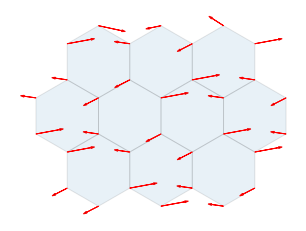

In [83]:
import numpy as np
import numpy.linalg as la

O = 1.6
C = 1.
M = 1.
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
Rw = np.array([[0., -1.], [1., 0.]])
precision = 1e-1
xw = np.pi / np.sqrt(3) * 2 # width of x
yw = np.pi / 3 * 4 # width of y
kxs = np.arange(-xw, xw, precision)
kys = np.arange(-yw, yw, precision)


evals_all = np.zeros((len(kys), len(kxs), 8), dtype=np.complex128)
evecs_all = np.zeros((len(kys), len(kxs), 8, 8), dtype=np.complex128)
for y, ky in enumerate(kys):
    for x, kx in enumerate(kxs):
        k = np.array([kx, ky])
        p = np.exp(1.j * k.dot(a1))
        s = np.exp(1.j * k.dot(a2))
        L11 = np.vstack([
            np.hstack([R11 + R22 + R33, -(R11 + p.conj() * R22 + s.conj() * R33)]),
            np.hstack([-(R11 + p * R22 + s * R33), R11 + R22 + R33])
        ])
        L12 = np.vstack([
            np.hstack([-Rw * 2.j * O, np.zeros((2, 2))]),
            np.hstack([np.zeros((2, 2)), -Rw * 2.j * O])
        ])
        L = w0 ** 2 * np.vstack([
            np.hstack([L11, L12]),
            np.hstack([np.zeros((4, 4)), np.eye(4)])
        ])
        M = np.vstack([
            np.hstack([np.zeros((4, 4)), np.eye(4)]),
            np.hstack([np.eye(4), np.zeros((4, 4))])
        ])

        H = np.linalg.inv(M).dot(L)
        evals, evecs = la.eig(H)
        idcs = np.argsort(evals)
        evals, evecs = evals[idcs], evecs[idcs]
        evals_all[y, x] = evals
        evecs_all[y, x] = evecs
evals_all = np.array(evals_all)
evecs_all = np.array(evecs_all)
print(evals_all.shape, evecs_all.shape)


x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1_ = 2 * np.pi / np.sqrt(3) / a * (x - y / np.sqrt(3)) 
a2_ = 4 * np.pi / 3 / a * y
G = np.array([[0.], [0.]])
K = (a1_ / 2 + a2_ / 4) / np.cos(np.pi / 6)**2
M = a1_ / 2

# Parameters #
kx = K[0] 
ky = K[1] 
mode = 5 # 1 or 2
###############

a1 = np.sqrt(3) * a * np.array([1, 0])
a2 = (np.sqrt(3) * np.array([1, 0]) + 3 * np.array([0, 1])) * a / 2.

k = np.array([kx[0], ky[0]])
p = np.exp(1.j * k.dot(a1))
s = np.exp(1.j * k.dot(a2))
idx = min(range(len(kxs)), key=lambda i: abs(kxs[i]-kx[0]))
idy = min(range(len(kys)), key=lambda i: abs(kys[i]-ky[0]))
vec = evecs_all[idy, idx, mode]
xi = vec[:2]
eta = vec[2:4]


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

dx = np.sqrt(3)
offCoord = [
    [0,-.5], [dx,-.5], [2*dx,-.5],
    [0,-.5] - a2, [dx,-.5] - a2, [2*dx,-.5] - a2, [3*dx,-.5] - a2,
    [0,-.5] - 2*a2 + a1, [dx,-.5] - 2*a2 + a1, [2*dx,-.5] - 2*a2 + a1
]

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

for c in offCoord:
    hexagon = RegularPolygon((c[0] + np.sqrt(3) / 2, c[1]), numVertices=6, radius=a, alpha=0.1, edgecolor='k')
    ax.add_patch(hexagon)
plt.autoscale(enable = True)

def arrow(pos, vec):
    ax.arrow(pos[0], pos[1], vec[0], vec[1], head_width=0.05, head_length=0.1, fc='black', ec='red')
    
# Xi
for i in range(4):
    xi_ = (xi * p**i).real
    pos = i * a1
    arrow(pos, xi_)
for i in range(5):
    xi_ = (xi * s.conj() * p**i).real
    pos = i * a1 - a2
    arrow(pos, xi_)
for i in range(4):
    xi_ = (xi * s.conj()**2 * p**(i + 1)).real
    pos = (i + 1) * a1 - 2 * a2
    arrow(pos, xi_)
for i in range(3):
    xi_ = (xi * s.conj()**3 * p**(i + 2)).real
    pos = (i + 2) * a1 - 3 * a2
    arrow(pos, xi_)
# Eta
for i in range(3):
    eta_ = (eta * p**i).real
    pos = np.squeeze(R1) + i * a1
    arrow(pos, eta_)
for i in range(4):
    eta_ = (xi * s.conj() * p**i).real
    pos = np.squeeze(R1) + i * a1 - a2
    arrow(pos, eta_)
for i in range(5):
    eta_ = (xi * s.conj()**2 * p**(i + 1)).real
    pos = np.squeeze(R1) + i * a1 - 2 * a2
    arrow(pos, eta_)
for i in range(4):
    eta_ = (xi * s.conj()**3 * p**(i + 2)).real
    pos = np.squeeze(R1) + (i + 1) * a1 - 3 * a2
    arrow(pos, eta_)
plt.axis('off')
plt.show()



### 1.1.3. Coriolis as a perturbation

(84, 73, 4) (84, 73, 4, 4)


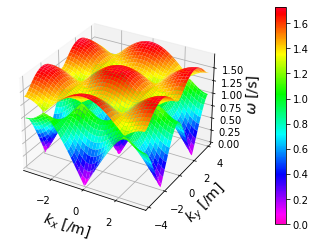

In [8]:
import numpy as np
import numpy.linalg as la



O = 0.
C = 1.
M = 1.
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
precision = 1e-1
xw = np.pi / np.sqrt(3) * 2 # width of x
yw = np.pi / 3 * 4 # width of y
kxs = np.arange(-xw, xw, precision)
kys = np.arange(-yw, yw, precision)


evals_all = np.zeros((len(kys), len(kxs), 4), dtype=np.complex128)
evecs_all = np.zeros((len(kys), len(kxs), 4, 4), dtype=np.complex128)
for y, ky in enumerate(kys):
    for x, kx in enumerate(kxs):
        k = np.array([kx, ky])
        p = np.exp(1.j * k.dot(a1))
        s = np.exp(1.j * k.dot(a2))
        H = w0**2 * np.vstack([
            np.hstack([R11 + R22 + R33 - 2.j * O / w0**2, -(R11 + R22 * p.conj() + R33 * s.conj())]),
            np.hstack([-(R11 + R22 * p + R33 * s) ,R11 + R22 + R33 - 2.j * O / w0**2]),
        ])
        evals, evecs = la.eigh(H)
        idcs = np.argsort(evals)
        evals, evecs = evals[idcs], evecs[idcs]
        evals_all[y, x] = evals
        evecs_all[y, x] = evecs
evals_all = np.array(evals_all)
evecs_all = np.array(evecs_all)
print(evals_all.shape, evecs_all.shape)


# 3D dispersion
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(kxs, kys)

vmax = np.amax(np.sqrt(evals_all[:, :, 2]).real)
ax.plot_surface(X, Y, np.sqrt(evals_all[:, :, 1]).real, vmin=0., vmax=vmax, cmap='gist_rainbow_r') 
p = ax.plot_surface(X, Y, np.sqrt(evals_all[:, :, 2]).real, vmin=0., vmax=vmax, cmap='gist_rainbow_r') 

ax.set_xlabel(r"$k_x$ [/m]", fontsize=14)
ax.set_xlim(-xw, xw)
ax.set_ylabel(r"$k_y$ [/m]", fontsize=14)
ax.set_ylim(-yw, yw)
ax.set_zlabel(r"$\omega$ [/s]", fontsize=14)
ax.set_zlim(0)

fig.colorbar(p, pad=0.15)
# fig.savefig("2d-graphene-dispersion-3d.png")
plt.show()

## 1.2. Dispersion relation of ribbon
### 1.2.1 inertial frame of reference

(37, 36) (37, 36, 36)


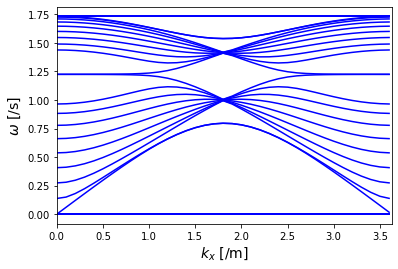

In [1]:
import numpy as np
import numpy.linalg as la

# Experimental setup
M = 1. # g
C = 1. # N/m
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
xmax = np.pi / np.sqrt(3) * 2
precision = 0.1
kxs = np.arange(0, xmax, precision) 


# System specific parameters
N = 9 # number of unit cells

evals_all, evecs_all  = [], []
for kx in kxs:
    k = np.array([kx, 0.])
    p = np.exp(1.j * k.dot(a1))

    H = np.zeros((N * 2 * 2, N * 2 * 2), dtype=np.complex128)
    L = np.vstack([
        np.hstack([R11 + R22 + R33, -R11 - R22 * p]),
        np.hstack([-R11 - R22 * p.conj(), R11 + R22 + R33]),
    ])

    for i in range(0, N * 2 * 2, 4):
        H[i:i+4, i:i+4] = L
    for i in range(0, N * 2 * 2 - 2, 2):
        if (i / 2) % 2 != 0:
            H[i:i+2, i+2:i+4] = -R33
            H[i+2:i+4, i:i+2] = -R33

    # Solve eigenvalue equation
    evals, evecs = la.eigh(w0**2 * H)
    idcs = np.argsort(evals)
    evals, evecs = evals[idcs], evecs[idcs]
    evals_all.append(evals)
    evecs_all.append(evecs)
evals_all, evecs_all = np.array(evals_all, dtype=np.complex128), np.array(evecs_all, dtype=np.complex128)
print(evals_all.shape, evecs_all.shape)


import matplotlib.pyplot as plt
# fig = plt.figure()
for i in range(evals_all.shape[1]):
    plt.plot(kxs, np.sqrt(evals_all[:, i]).real, color='blue')
plt.xlabel(r"$k_x$ [/m]", fontsize=14)
plt.xlim(0, xmax)
plt.ylabel(r"$\omega$ [/s]", fontsize=14)
plt.show()
# fig.savefig("1d-dispersion-coriolis-06.png")

#### 1.2.1.1. Visualize eigenvectors

(37, 36) (37, 36, 36)


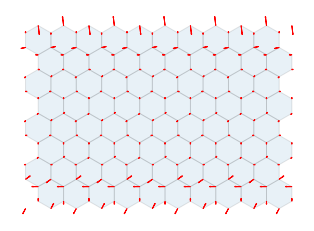

In [1]:
import numpy as np
import numpy.linalg as la

# Experimental setup
M = 1. # g
C = 1. # N/m
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
xmax = np.pi / np.sqrt(3) * 2
precision = 0.1
kxs = np.arange(0, xmax, precision) 


# System specific parameters
N = 9 # number of unit cells

evals_all, evecs_all  = [], []
for kx in kxs:
    k = np.array([kx, 0.])
    p = np.exp(1.j * k.dot(a1))

    H = np.zeros((N * 2 * 2, N * 2 * 2), dtype=np.complex128)
    L = np.vstack([
        np.hstack([R11 + R22 + R33, -R11 - R22 * p]),
        np.hstack([-R11 - R22 * p.conj(), R11 + R22 + R33]),
    ])

    for i in range(0, N * 2 * 2, 4):
        H[i:i+4, i:i+4] = L
    for i in range(0, N * 2 * 2 - 2, 2):
        if (i / 2) % 2 != 0:
            H[i:i+2, i+2:i+4] = -R33
            H[i+2:i+4, i:i+2] = -R33

    # Solve eigenvalue equation
    evals, evecs = la.eigh(w0**2 * H)
    idcs = np.argsort(evals)
    evals, evecs = evals[idcs], evecs[idcs]
    evals_all.append(evals)
    evecs_all.append(evecs)
evals_all, evecs_all = np.array(evals_all, dtype=np.complex128), np.array(evecs_all, dtype=np.complex128)
print(evals_all.shape, evecs_all.shape)


### Plot eigenvectors ###
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1_ = 2 * np.pi / np.sqrt(3) / a * (x - y / np.sqrt(3)) 
a2_ = 4 * np.pi / 3 / a * y
G = np.array([[0.], [0.]])
K = (a1_ / 2 + a2_ / 4) / np.cos(np.pi / 6)**2
M = a1_ / 2

# Parameters #
kx = M[0] 
ky = M[1] 
# print(np.sqrt(evals_all[: 18]).real)
mode = 23 # 1 or 2
###############

a1 = np.sqrt(3) * a * np.array([1, 0])
a2 = (np.sqrt(3) * np.array([1, 0]) + 3 * np.array([0, 1])) * a / 2.

k = np.array([kx[0], ky[0]])
p = np.exp(1.j * k.dot(a1))
s = np.exp(1.j * k.dot(a2))
idx = min(range(len(kxs)), key=lambda i: abs(kxs[i]-kx[0]))
vec = evecs_all[idx, mode]



import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

dx = np.sqrt(3)
dy = 3
offCoord = [
    [dx * x + np.sqrt(3), dy * y + 1] for y in range(4) for x in range(10)
]
offCoord.extend([
    [dx * x + np.sqrt(3) / 2, dy * y + 2.5] for y in range(4) for x in range(10)
])

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

for c in offCoord:
    hexagon = RegularPolygon((c[0], c[1]), numVertices=6, radius=a, alpha=0.1, edgecolor='k')
    ax.add_patch(hexagon)
plt.autoscale(enable = True)


def arrow(pos, vec):
    ax.arrow(pos[0], pos[1], vec[0], vec[1], head_width=0.05, head_length=0.1, fc='black', ec='red')

for j in range(11):
    for power, i in enumerate(range(0, 9, 2)):
        xi = vec[i*4:i*4+2]
        eta = vec[i*4+2:i*4+4]
        xi_ = (xi * p**(power+j)).real
        eta_ = (eta * p**(power+j)).real
        arrow([0., 3 * power] + a1 * j, xi_)
        arrow(np.squeeze(R1) + [0, 3 * power] + a1 * j, eta_)
    for power, i in enumerate(range(1, 9, 2)):
        xi = vec[i*4:i*4+2]
        eta = vec[i*4+2:i*4+4]
        xi_ = (xi * p**(power+j)).real
        eta_ = (eta * p**(power+j+1)).real
        xi_ = (xi * p**i).real
        arrow(np.squeeze(R1) + [0, 1 + 3 * power] + a1 * j, xi_)
        arrow([0., 3 * power + 2] + a1 * j, eta_)

plt.axis('off')
plt.show()
plt.show()

### 1.2.2. Coriolis 

(37, 72) (37, 72, 72)


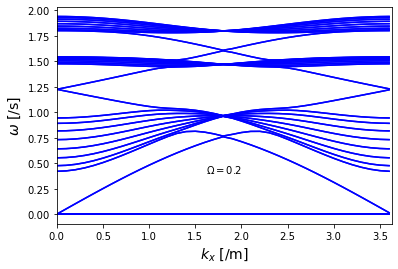

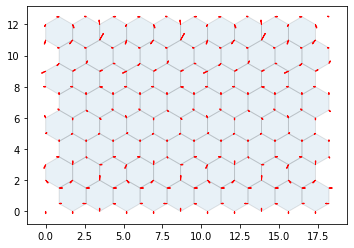

In [76]:
import numpy as np
import numpy.linalg as la

# Experimental setup
O = .2
M = 1. # g
C = 1. # N/m
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
Rw = np.array([[0., -1.], [1., 0.]])
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
xmax = np.pi / np.sqrt(3) * 2
precision = 0.1
kxs = np.arange(0, xmax, precision) 


# System specific parameters
N = 9 # number of unit cells
evec_size = 2
evec_num = 4

evals_all, evecs_all  = [], []
for kx in kxs:
    k = np.array([kx, 0.])
    p = np.exp(1.j * k.dot(a1))

    # Build Hamiltonian
    L11 = np.vstack([
        np.hstack([R11 + R22 + R33, -(R11 + p.conj() * R22)]),
        np.hstack([-(R11 + p * R22), R11 + R22 + R33])
    ])
    L12 = np.vstack([
        np.hstack([-Rw * 2.j * O, np.zeros((2, 2))]),
        np.hstack([np.zeros((2, 2)), -Rw * 2.j * O])
    ])
    L = w0 ** 2 * np.vstack([
        np.hstack([L11, L12]),
        np.hstack([np.zeros((4, 4)), np.eye(4)])
    ])
    C = np.vstack([
        np.hstack([np.zeros((2, 2)), -R33]),
        np.zeros((2, 4))
    ])
    Cb = np.vstack([
        np.hstack([C, np.zeros((4, 4))]),
        np.zeros((4, 8))
    ])

    ss = evec_size * evec_num # size of the sublattice, 8 in this case
    dim = N * evec_size * evec_num
    H = np.zeros((dim, dim), dtype=np.complex128)

    for i in range(0, dim, 8):
        H[i:i+ss, i:i+ss] = L
    for i in range(8, dim, 8):
        H[i:i+ss, i-ss:i] = Cb
        H[i-ss:i, i:i+ss] = Cb.T

    M = np.zeros((dim, dim), dtype=np.complex128)
    for i in range(0, dim, 8):
        M_ = np.vstack([
            np.hstack([np.zeros((4, 4)), np.eye(4)]),
            np.hstack([np.eye(4), np.zeros((4, 4))])
        ])
        M[i:i+ss, i:i+ss] = M_

    M_inv = la.inv(M)
    H = w0**2 * H
    # Solve eigenvalue equation
    evals, evecs = la.eig(M_inv.dot(H))
    idcs = np.argsort(evals)
    evals, evecs = evals[idcs], evecs[idcs]
    evals_all.append(evals)
    evecs_all.append(evecs)
evals_all, evecs_all = np.array(evals_all, dtype=np.complex128), np.array(evecs_all, dtype=np.complex128)
print(evals_all.shape, evecs_all.shape)


import matplotlib.pyplot as plt
# fig = plt.figure()
for i in range(evals_all.shape[1]):
    plt.plot(kxs, abs(evals_all[:, i].real), color='blue')
plt.xlabel(r"$k_x$ [/m]", fontsize=14)
plt.xlim(0, xmax)
plt.figtext(.47, .3, r"$\Omega=$" + f'{O:.1f}', fontsize=10)
plt.ylabel(r"$\omega$ [/s]", fontsize=14)
plt.show()
# fig.savefig("1d-dispersion-coriolis-06.png")


#### Plot eigen vectors ####
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1_ = 2 * np.pi / np.sqrt(3) / a * (x - y / np.sqrt(3)) 
a2_ = 4 * np.pi / 3 / a * y
G = np.array([[0.], [0.]])
K = (a1_ / 2 + a2_ / 4) / np.cos(np.pi / 6)**2
M = a1_ / 2

# Parameters #
kx = K[0] 
ky = K[1] 
mode = 15 # 1 or 2
###############

a1 = np.sqrt(3) * a * np.array([1, 0])
a2 = (np.sqrt(3) * np.array([1, 0]) + 3 * np.array([0, 1])) * a / 2.

k = np.array([kx[0], ky[0]])
p = np.exp(1.j * k.dot(a1))
s = np.exp(1.j * k.dot(a2))
idx = min(range(len(kxs)), key=lambda i: abs(kxs[i]-kx[0]))
vec = evecs_all[idx, mode]



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

dx = np.sqrt(3)
dy = 3
offCoord = [
    [dx * x + np.sqrt(3), dy * y + 1] for y in range(4) for x in range(10)
]
offCoord.extend([
    [dx * x + np.sqrt(3) / 2, dy * y + 2.5] for y in range(4) for x in range(10)
])

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

for c in offCoord:
    hexagon = RegularPolygon((c[0], c[1]), numVertices=6, radius=a, alpha=0.1, edgecolor='k')
    ax.add_patch(hexagon)
plt.autoscale(enable = True)


def arrow(pos, vec):
    ax.arrow(pos[0], pos[1], vec[0], vec[1], head_width=0.05, head_length=0.1, fc='black', ec='red')

for j in range(11):
    for power, i in enumerate(range(0, 9, 2)):
        xi = vec[i*8:i*8+2]
        eta = vec[i*8+2:i*8+4]
        xi_ = (xi * p**(power+j)).real
        eta_ = (eta * p**(power+j)).real
        arrow([0., 3 * power] + a1 * j, xi_)
        arrow(np.squeeze(R1) + [0, 3 * power] + a1 * j, eta_)
    for power, i in enumerate(range(1, 9, 2)):
        xi = vec[i*8:i*8+2]
        eta = vec[i*8+2:i*8+4]
        xi_ = (xi * p**(power+j)).real
        eta_ = (eta * p**(power+j+1)).real
        xi_ = (xi * p**i).real
        arrow(np.squeeze(R1) + [0, 1 + 3 * power] + a1 * j, xi_)
        arrow([0., 3 * power + 2] + a1 * j, eta_)

# plt.axis('off')
plt.show()

### 1.2.3. Coriolis as a perturbation

(37, 36) (37, 36, 36)


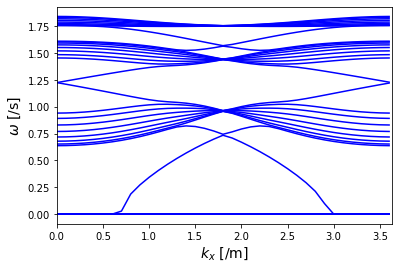

[0. 0.] [ 0.07418095 -0.10484803]
[0.8660254 0.5      ] [-0.06993834 -0.01990595]
[0. 3.] [-1.66617116e-03 -1.44146040e-16]
[0.8660254 3.5      ] [0.20541222 0.3298029 ]
[0. 6.] [-0.17538897 -0.12433992]
[0.8660254 6.5      ] [0.2074169  0.33089808]
[0. 9.] [-0.17917391 -0.12552135]
[0.8660254 9.5      ] [1.66439270e-03 9.50520455e-17]
[ 0. 12.] [ 0.12284458 -0.1969509 ]
[ 0.8660254 12.5      ] [-0.20001529  0.12512916]
[0.8660254 1.5      ] [ 0.12565896 -0.19783733]
[0. 2.] [-0.19965459  0.12456866]
[0.8660254 4.5      ] [-0.32770948 -0.20895556]
[0. 5.] [-0.03351583  0.11653108]
[0.8660254 7.5      ] [0.32479737 0.20164325]
[0. 8.] [-0.0245095   0.12373341]
[ 0.8660254 10.5      ] [ 0.07698748 -0.10964595]
[ 0. 11.] [0.0753612  0.01529998]
[1.73205081 0.        ] [-0.07418095  0.10484803]
[2.59807621 0.5       ] [0.06993834 0.01990595]
[1.73205081 3.        ] [1.66617116e-03 1.44146040e-16]
[2.59807621 3.5       ] [-0.20541222 -0.3298029 ]
[1.73205081 6.        ] [0.17538897 0.124339

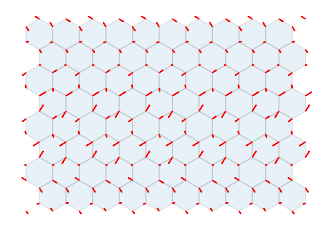

In [6]:
import numpy as np
import numpy.linalg as la

# Experimental setup
O = 0.2
M = 1. # g
C = 1. # N/m
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
xmax = np.pi / np.sqrt(3) * 2
precision = 0.1
kxs = np.arange(0, xmax, precision) 


# System specific parameters
N = 9 # number of unit cells

evals_all, evecs_all  = [], []
for kx in kxs:
    k = np.array([kx, 0.])
    p = np.exp(1.j * k.dot(a1))

    H = np.zeros((N * 2 * 2, N * 2 * 2), dtype=np.complex128)
    L = np.vstack([
        np.hstack([R11 + R22 + R33 - 2.j * O / w0**2, -R11 - R22 * p]),
        np.hstack([-R11 - R22 * p.conj(), R11 + R22 + R33 - 2.j * O / w0**2]),
    ])

    for i in range(0, N * 2 * 2, 4):
        H[i:i+4, i:i+4] = L
    for i in range(0, N * 2 * 2 - 2, 2):
        if (i / 2) % 2 != 0:
            H[i:i+2, i+2:i+4] = -R33
            H[i+2:i+4, i:i+2] = -R33

    # Solve eigenvalue equation
    evals, evecs = la.eigh(w0**2 * H)
    idcs = np.argsort(evals)
    evals, evecs = evals[idcs], evecs[idcs]
    evals_all.append(evals)
    evecs_all.append(evecs)
evals_all, evecs_all = np.array(evals_all, dtype=np.complex128), np.array(evecs_all, dtype=np.complex128)
print(evals_all.shape, evecs_all.shape)


import matplotlib.pyplot as plt
# fig = plt.figure()
for i in range(evals_all.shape[1]):
    plt.plot(kxs, np.sqrt(evals_all[:, i]).real, color='blue')
plt.xlabel(r"$k_x$ [/m]", fontsize=14)
plt.xlim(0, xmax)
plt.ylabel(r"$\omega$ [/s]", fontsize=14)
plt.show()
# fig.savefig("1d-dispersion-coriolis-06.png")


### Plot eigenvectors ###
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1_ = 2 * np.pi / np.sqrt(3) / a * (x - y / np.sqrt(3)) 
a2_ = 4 * np.pi / 3 / a * y
G = np.array([[0.], [0.]])
K = (a1_ / 2 + a2_ / 4) / np.cos(np.pi / 6)**2
M = a1_ / 2

# Parameters #
kx = M[0] 
ky = M[1] 
# print(np.sqrt(evals_all[: 18]).real)
mode = 30 # 1 or 2
###############

a1 = np.sqrt(3) * a * np.array([1, 0])
a2 = (np.sqrt(3) * np.array([1, 0]) + 3 * np.array([0, 1])) * a / 2.

k = np.array([kx[0], ky[0]])
p = np.exp(1.j * k.dot(a1))
s = np.exp(1.j * k.dot(a2))
idx = min(range(len(kxs)), key=lambda i: abs(kxs[i]-kx[0]))
vec = evecs_all[idx, mode]



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

dx = np.sqrt(3)
dy = 3
offCoord = [
    [dx * x + np.sqrt(3), dy * y + 1] for y in range(4) for x in range(10)
]
offCoord.extend([
    [dx * x + np.sqrt(3) / 2, dy * y + 2.5] for y in range(4) for x in range(10)
])

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

for c in offCoord:
    hexagon = RegularPolygon((c[0], c[1]), numVertices=6, radius=a, alpha=0.1, edgecolor='k')
    ax.add_patch(hexagon)
plt.autoscale(enable = True)


def arrow(pos, vec):
    print(pos, vec)
    ax.arrow(pos[0], pos[1], vec[0], vec[1], head_width=0.05, head_length=0.1, fc='black', ec='red')

for j in range(11):
    for power, i in enumerate(range(0, 9, 2)):
        xi = vec[i*4:i*4+2]
        eta = vec[i*4+2:i*4+4]
        xi_ = (xi * p**(power+j)).real
        eta_ = (eta * p**(power+j)).real
        arrow([0., 3 * power] + a1 * j, xi_)
        arrow(np.squeeze(R1) + [0, 3 * power] + a1 * j, eta_)
    for power, i in enumerate(range(1, 9, 2)):
        xi = vec[i*4:i*4+2]
        eta = vec[i*4+2:i*4+4]
        xi_ = (xi * p**(power+j)).real
        eta_ = (eta * p**(power+j+1)).real
        xi_ = (xi * p**i).real
        arrow(np.squeeze(R1) + [0, 1 + 3 * power] + a1 * j, xi_)
        arrow([0., 3 * power + 2] + a1 * j, eta_)

plt.axis('off')
plt.show()

# 2. 1d
## 2.1. edge (Free boundary)
### 2.1.1. inertial frame of reference
#### 2.1.1.1. x,y

(48,) (48, 48)


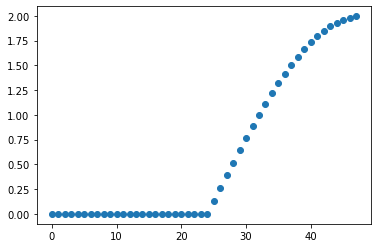

In [9]:
import numpy as np
import numpy.linalg as la

# Experimental setup
M = 1. # g
C = 1. # N/m
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat

precision = 0.1


# System specific parameters
N = 12 # number of unit cells


H = np.zeros((N * 2 * 2, N * 2 * 2), dtype=np.complex128)
L_fst = np.vstack([
    np.hstack([1, 0, -1, 0]),
    np.zeros((1, 4)),
    np.hstack([-1, 0, 2, 0]),
    np.zeros((1, 4))
])
L_last = np.vstack([
    np.hstack([2, 0, -1, 0]),
    np.zeros((1, 4)),
    np.hstack([-1, 0, 1, 0]),
    np.zeros((1, 4))
])

L = np.vstack([
    np.hstack([2, 0, -1, 0]),
    np.zeros((1, 4)),
    np.hstack([-1, 0, 2, 0]),
    np.zeros((1, 4))
])
C = np.array([[-1., 0.], [0., 0.]])
C_ = np.vstack([
    np.zeros((2, 4)),
    np.hstack([C, np.zeros((2,2))])
])
H[:4, :4] = L_fst
H[N*4-4:N*4, N*4-4:N*4] = L_last
for i in range(4, N * 2 * 2 - 4, 4):
    H[i:i+4, i:i+4] = L
for i in range(0, N * 2 * 2 - 4, 4):
    H[i:i+4, i+4:i+8] = C_
    H[i+4:i+8, i:i+4] = C_.T

# Solve eigenvalue equation
evals, evecs = la.eig(w0**2 * H)
idcs = np.argsort(evals)
evals, evecs = evals[idcs], evecs[idcs]

print(evals.shape, evecs.shape)

import matplotlib.pyplot as plt

plt.scatter(np.arange(len(evals)), np.sqrt(evals).real)
plt.show()


import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_plot(mode: int):
    dx = 1
    offCoord = [[i * dx, 0.] for i in range(N * 2)]
    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')

    for c in offCoord:
        hexagon = Circle((c[0], c[1]), radius=0.1, ec='silver', fill=False, lw=1.5)
        ax.add_patch(hexagon)

    plt.autoscale(enable = True)
    for i in range(N):
        i_ = i * 2
        pos_xi = offCoord[i_]
        pos_eta = offCoord[i_ + 1]
        i_ = i * 4
        xi = evecs[mode][i_:i_+2].real
        eta = evecs[mode][i_+2:i_+4].real
        ax.arrow(pos_xi[0], pos_xi[1], xi[0], xi[1], width=0.02, head_width=0.1, head_length=0.1, fc='r', ec='r')
        ax.arrow(pos_eta[0], pos_eta[1], eta[0], eta[1], width=0.02, head_width=0.1, head_length=0.1, fc='r', ec='r')
    plt.axis('off')
    plt.show()

# for i, e in enumerate(evals):
#     print(i, e)
#     draw_plot(i)

#### 2.1.1.2. with x only

(16,) (16, 16)


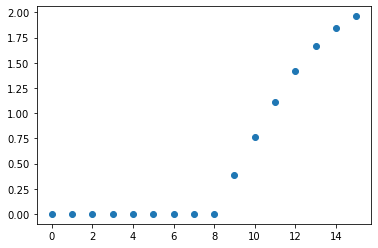

In [86]:
import numpy as np
import numpy.linalg as la

# Experimental setup
M = 1. # g
C = 1. # N/m
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat

precision = 0.1


# System specific parameters
N = 4 # number of unit cells


H = np.zeros((N * 2 * 2, N * 2 * 2), dtype=np.complex128)
L_fst = np.vstack([
    np.hstack([1, -1]),
    np.hstack([-1, 2]),
])
L_last = np.vstack([
    np.hstack([2, -1]),
    np.hstack([-1, 1]),
])

L = np.vstack([
    np.hstack([2, -1]),
    np.hstack([-1, 2]),
])
C = np.array([[0., 0.], [-1, 0.]])
H[:2, :2] = L_fst
H[N*2-2:N*2, N*2-2:N*2] = L_last
for i in range(2, N * 2 - 2, 2):
    H[i:i+2, i:i+2] = L
for i in range(0, N * 2 - 2, 2):
    H[i:i+2, i+2:i+4] = C
    H[i+2:i+4, i:i+2] = C.T

# Solve eigenvalue equation
evals, evecs = la.eig(w0**2 * H)
idcs = np.argsort(evals)
evals, evecs = evals[idcs], evecs[idcs]

print(evals.shape, evecs.shape)

import matplotlib.pyplot as plt

plt.scatter(np.arange(len(evals)), np.sqrt(evals).real)
plt.show()

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_plot(mode: int):
    dx = 1
    offCoord = [[i * dx, 0.] for i in range(N * 2)]
    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')

    for c in offCoord:
        hexagon = Circle((c[0], c[1]), radius=0.1, ec='silver', fill=False, lw=1.5)
        ax.add_patch(hexagon)

    plt.autoscale(enable = True)
    for i in range(N):
        i_ = i * 2
        pos_xi = offCoord[i_]
        pos_eta = offCoord[i_ + 1]
        i_ = i * 2
        xi = evecs[mode][i_].real
        eta = evecs[mode][i_+1].real
        ax.arrow(pos_xi[0], pos_xi[1], 0, xi, width=0.02, head_width=0.1, head_length=0.1, fc='r', ec='r')
        ax.arrow(pos_eta[0], pos_eta[1], 0, eta, width=0.02, head_width=0.1, head_length=0.1, fc='r', ec='r')
    plt.axis('off')
    plt.show()

# for i, e in enumerate(evals):
#     print(i, e)
#     draw_plot(i)


### 2.1.2. non-inertial reference frame

(96,) (96, 96)


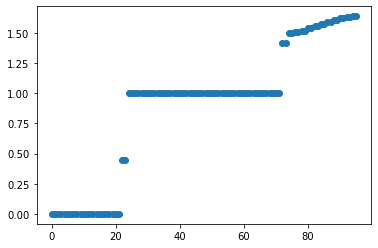

In [7]:
import numpy as np
import numpy.linalg as la

# Experimental setup
O = 14
M = 1. # g
C = 1. # N/m
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat

precision = 0.1


# System specific parameters
N = 12 # number of unit cells


H = np.zeros((N * 8, N * 8), dtype=np.complex128)
L11_fst = np.vstack([
    np.hstack([1, 0, -1, 0]),
    np.zeros((1, 4)),
    np.hstack([-1, 0, 2, 0]),
    np.zeros((1, 4))
])
L11_last = np.vstack([
    np.hstack([2, 0, -1, 0]),
    np.zeros((1, 4)),
    np.hstack([-1, 0, 1, 0]),
    np.zeros((1, 4))
])
L11 = np.vstack([
    np.hstack([2, 0, -1, 0]),
    np.zeros((1, 4)),
    np.hstack([-1, 0, 2, 0]),
    np.zeros((1, 4))
])
Rw = np.array([[0., -1.], [1., 0.]])
L12 = np.vstack([
    np.hstack([-Rw * 2.j * O, np.zeros((2, 2))]),
    np.hstack([np.zeros((2, 2)), -Rw * 2.j * O])
])
L = w0 ** 2 * np.vstack([
    np.hstack([L11, L12]),
    np.hstack([np.zeros((4, 4)), np.eye(4)])
])
L_fst = w0 ** 2 * np.vstack([
    np.hstack([L11, L12]),
    np.hstack([np.zeros((4, 4)), np.eye(4)])
])
L_last = w0 ** 2 * np.vstack([
    np.hstack([L11, L12]),
    np.hstack([np.zeros((4, 4)), np.eye(4)])
])
C = np.array([[-1., 0.], [0., 0.]])
C_ = np.vstack([
    np.hstack([np.zeros((2, 2)), C]),
    np.zeros((2, 4))
])
Cb = np.vstack([
    np.hstack([C_, np.zeros((4,4))]),
    np.zeros((4, 8)),
])


transverse = True
if transverse:
    L11_fst = np.vstack([
        np.array([1, 0, -1, 0]),
        .1 * np.array([0, 1, 0, -1]),
        np.array([-1, 0, 2, 0]),
        .1 * np.array([0, -1, 0, 2]),
    ])
    L11_last = np.vstack([
        np.array([2, 0, -1, 0]),
        .1 * np.array([0, 2, 0, -1]),
        np.array([-1, 0, 1, 0]),
        .1 * np.array([0, -1, 0, 1]),
    ])
    L11 = np.vstack([
        np.array([2, 0, -1, 0]),
        .1 * np.array([0, 2, 0, -1]),
        .1 * np.array([-1, 0, 2, 0]),
        np.array([0, -1, 0, 2]),
    ])
    Rw = np.array([[0., -1.], [1., 0.]])
    L12 = np.vstack([
        np.hstack([-Rw * 2.j * O, np.zeros((2, 2))]),
        np.hstack([np.zeros((2, 2)), -Rw * 2.j * O])
    ])
    L = w0 ** 2 * np.vstack([
        np.hstack([L11, L12]),
        np.hstack([np.zeros((4, 4)), np.eye(4)])
    ])
    L_fst = w0 ** 2 * np.vstack([
        np.hstack([L11, L12]),
        np.hstack([np.zeros((4, 4)), np.eye(4)])
    ])
    L_last = w0 ** 2 * np.vstack([
        np.hstack([L11, L12]),
        np.hstack([np.zeros((4, 4)), np.eye(4)])
    ])
    C = np.array([[-1., 0.], [0., -1.]])
    C_ = np.vstack([
        np.hstack([np.zeros((2, 2)), C]),
        np.zeros((2, 4))
    ])
    Cb = np.vstack([
        np.hstack([C_, np.zeros((4,4))]),
        np.zeros((4, 8)),
    ])

H[:8, :8] = L_fst
H[N*8-8:N*8, N*8-8:N*8] = L_last
for i in range(8, N * 8 - 8, 8):
    H[i:i+8, i:i+8] = L
for i in range(8, N * 8, 8):
    H[i:i+8, i-8:i] = Cb
    H[i-8:i, i:i+8] = Cb.T

# Solve eigenvalue equation
evals, evecs = la.eig(w0**2 * H)
idcs = np.argsort(evals)
evals, evecs = evals[idcs], evecs[idcs]

print(evals.shape, evecs.shape)

import matplotlib.pyplot as plt

plt.scatter(np.arange(len(evals)), np.sqrt(evals).real)
plt.show()

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_plot(mode: int):
    dx = 1
    offCoord = [[i * dx, 0.] for i in range(N * 2)]
    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')

    for c in offCoord:
        hexagon = Circle((c[0], c[1]), radius=0.1, ec='silver', fill=False, lw=1.5)
        ax.add_patch(hexagon)

    plt.autoscale(enable = True)
    for i in range(N):
        i_ = i * 2
        pos_xi = offCoord[i_]
        pos_eta = offCoord[i_ + 1]
        i_ = i * 8
        xi = evecs[mode][i_:i_+2].real
        eta = evecs[mode][i_+2:i_+4].real
        ax.arrow(pos_xi[0], pos_xi[1], xi[0], xi[1], width=0.02, head_width=0.1, head_length=0.1, fc='r', ec='r')
        ax.arrow(pos_eta[0], pos_eta[1], eta[0], eta[1], width=0.02, head_width=0.1, head_length=0.1, fc='r', ec='r')
    plt.axis('off')
    plt.show()

# for i, e in enumerate(evals):
#     print(i, e)
#     draw_plot(i)